In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [ ]:
label_encoder = LabelEncoder()
data["Geography"] = label_encoder.fit_transform(data["Geography"])
data["Gender"] = label_encoder.fit_transform(data["Gender"])

In [ ]:
X = data.drop(columns=["Exited"])
y = data["Exited"]


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=lr.predict(X_test)
lr.score(X_test,y_test)

0.815

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



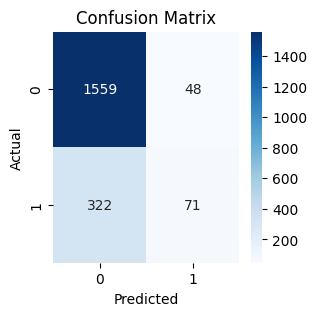

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(3,3 ))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rf=rf.predict(X_test)
rf.score(X_test,y_test)

0.868

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



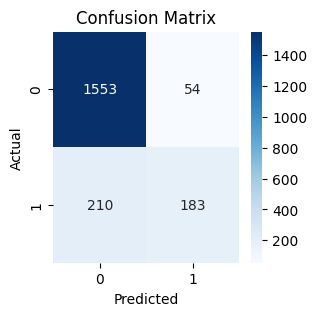

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(3,3 ))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
pred_gb=gb.predict(X_test)
gb.score(X_test,y_test)

0.865

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



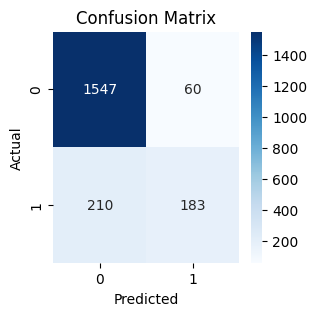

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_pred = gb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(3,3 ))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()